In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


df = pd.read_csv("/content/diabetes.csv")


Initial Data Overview

In [4]:
print("Shape of data:", df.shape)
print("\nColumns:\n", df.columns)
df.info()
df.describe().T

Shape of data: (768, 9)

Columns:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Checking for Missing Values (0s as placeholders)

Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros


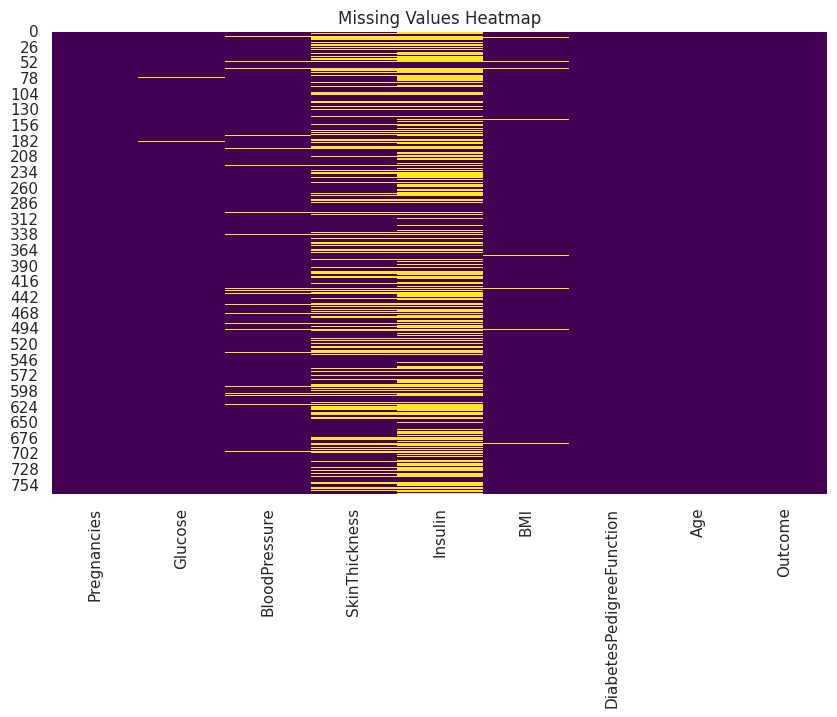

,0
Insulin,0.486979
SkinThickness,0.295573
BloodPressure,0.045573
BMI,0.014323
Glucose,0.006510
Pregnancies,0.000000
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


In [5]:
# Features where 0 indicates missing
cols_with_missing_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zeros
for col in cols_with_missing_zeros:
    print(f"{col} has {(df[col] == 0).sum()} zeros")

# Replace 0s with NaN
df[cols_with_missing_zeros] = df[cols_with_missing_zeros].replace(0, np.nan)

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Check % of missing
df.isnull().mean().sort_values(ascending=False)


 Univariate Distribution Analysis

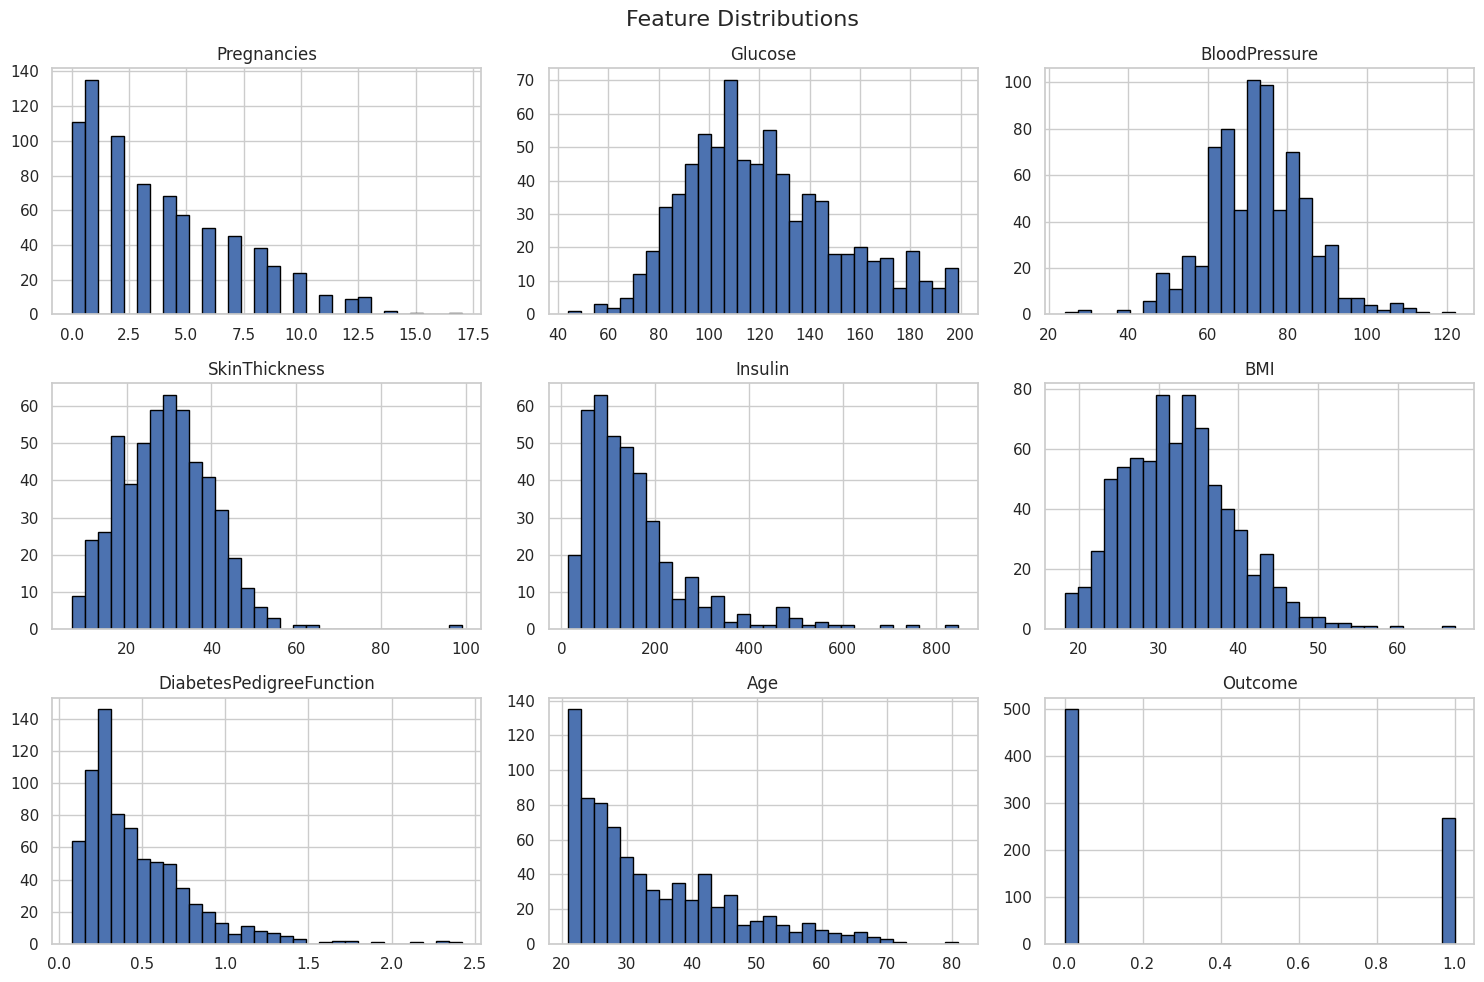

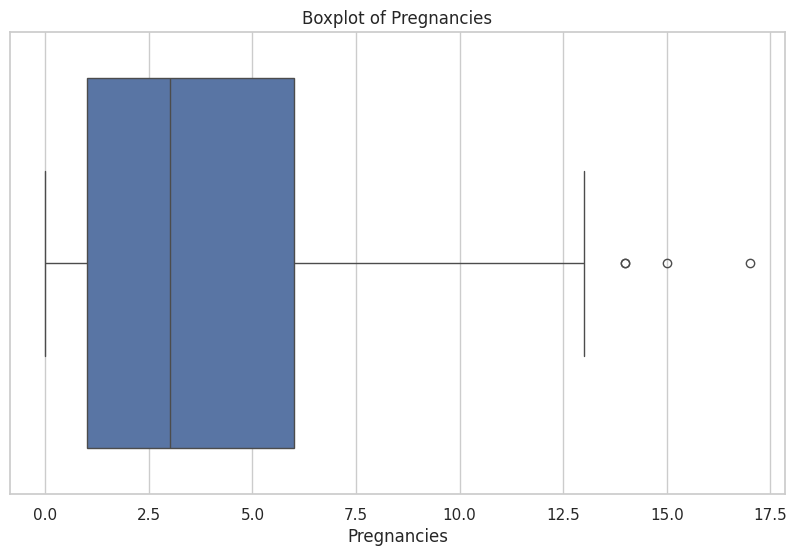

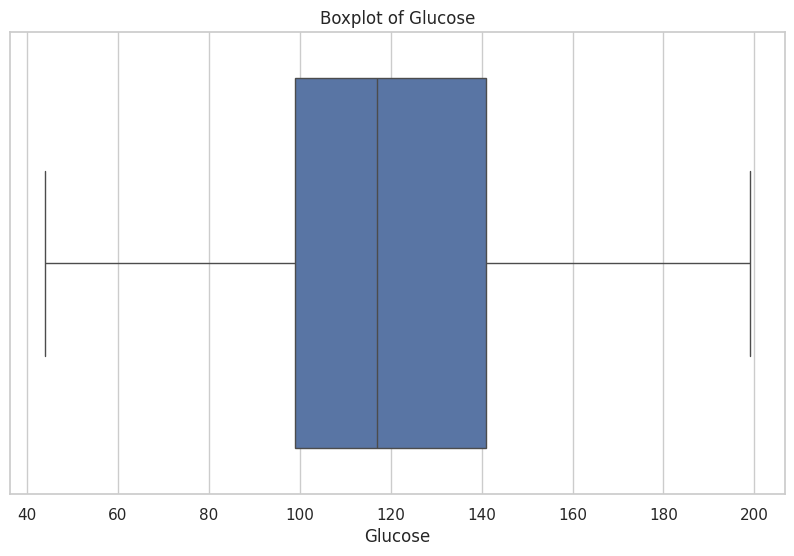

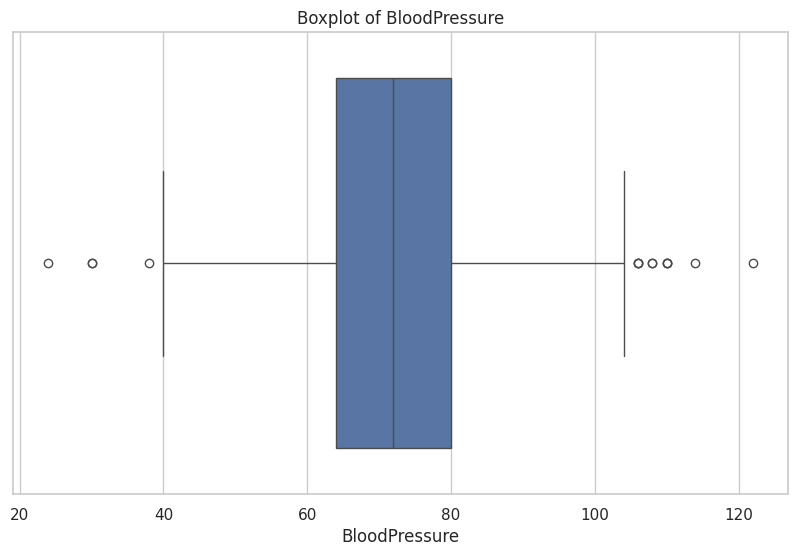

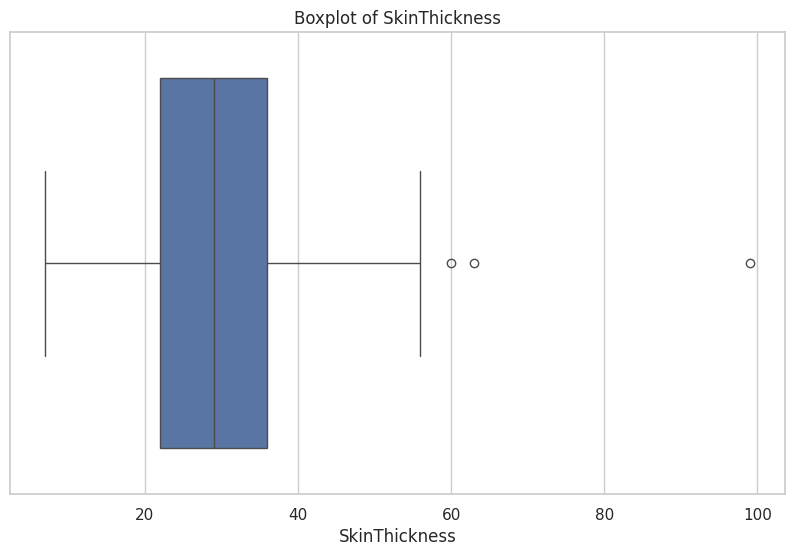

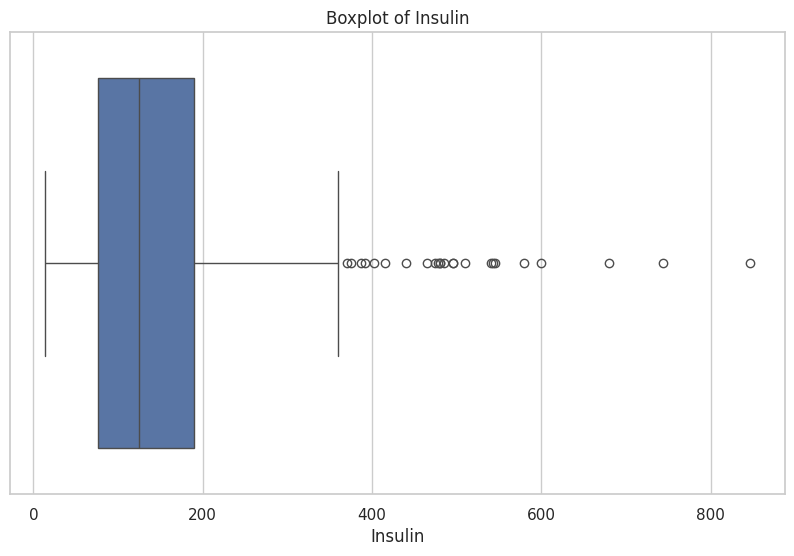

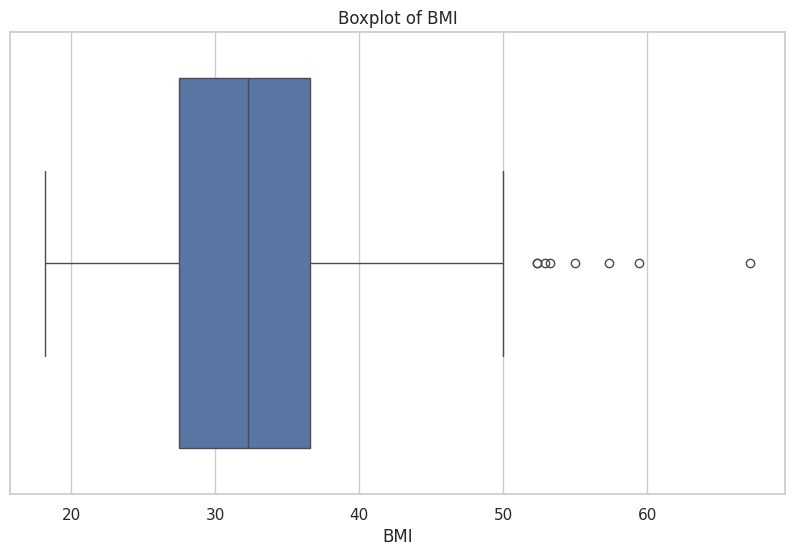

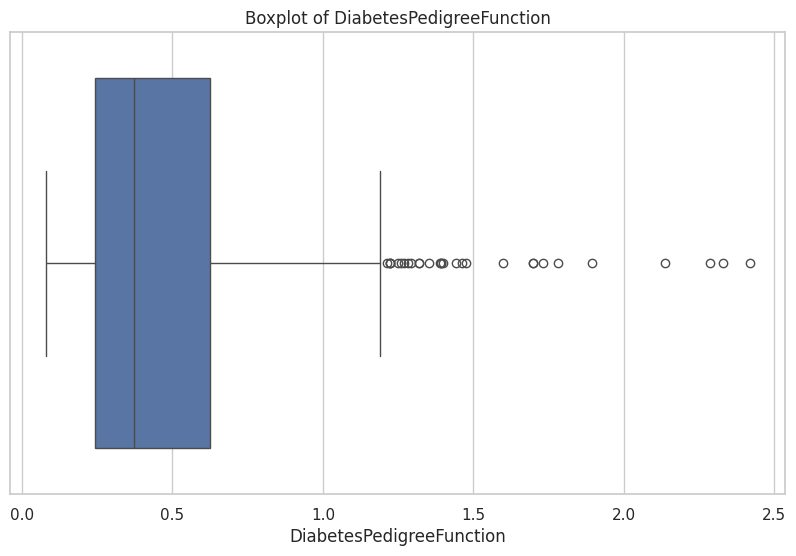

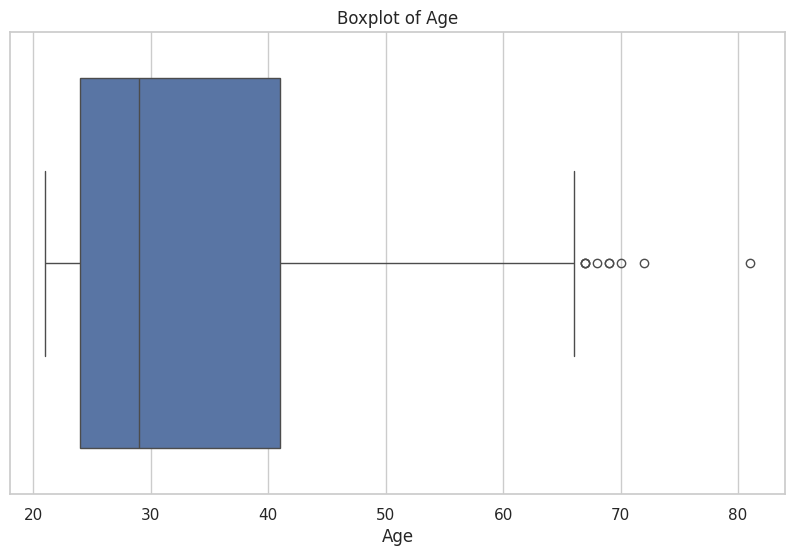

In [6]:
# Histograms
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Box plots to detect outliers
for col in df.columns[:-1]:  # Skip 'Outcome'
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Skewness and Kurtosis

In [7]:
for col in df.columns[:-1]:
    print(f"{col} - Skewness: {skew(df[col].dropna()):.2f}, Kurtosis: {kurtosis(df[col].dropna()):.2f}")

Pregnancies - Skewness: 0.90, Kurtosis: 0.15
Glucose - Skewness: 0.53, Kurtosis: -0.28
BloodPressure - Skewness: 0.13, Kurtosis: 0.90
SkinThickness - Skewness: 0.69, Kurtosis: 2.90
Insulin - Skewness: 2.16, Kurtosis: 6.27
BMI - Skewness: 0.59, Kurtosis: 0.85
DiabetesPedigreeFunction - Skewness: 1.92, Kurtosis: 5.55
Age - Skewness: 1.13, Kurtosis: 0.63


 Bivariate Analysis

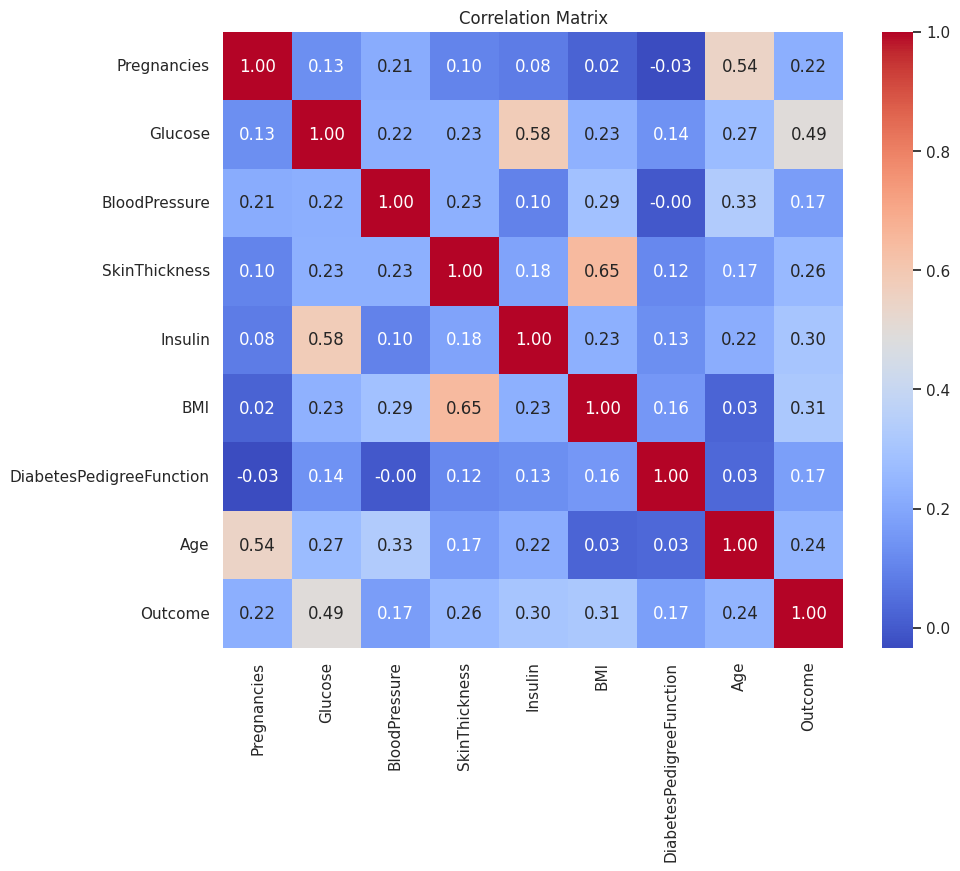

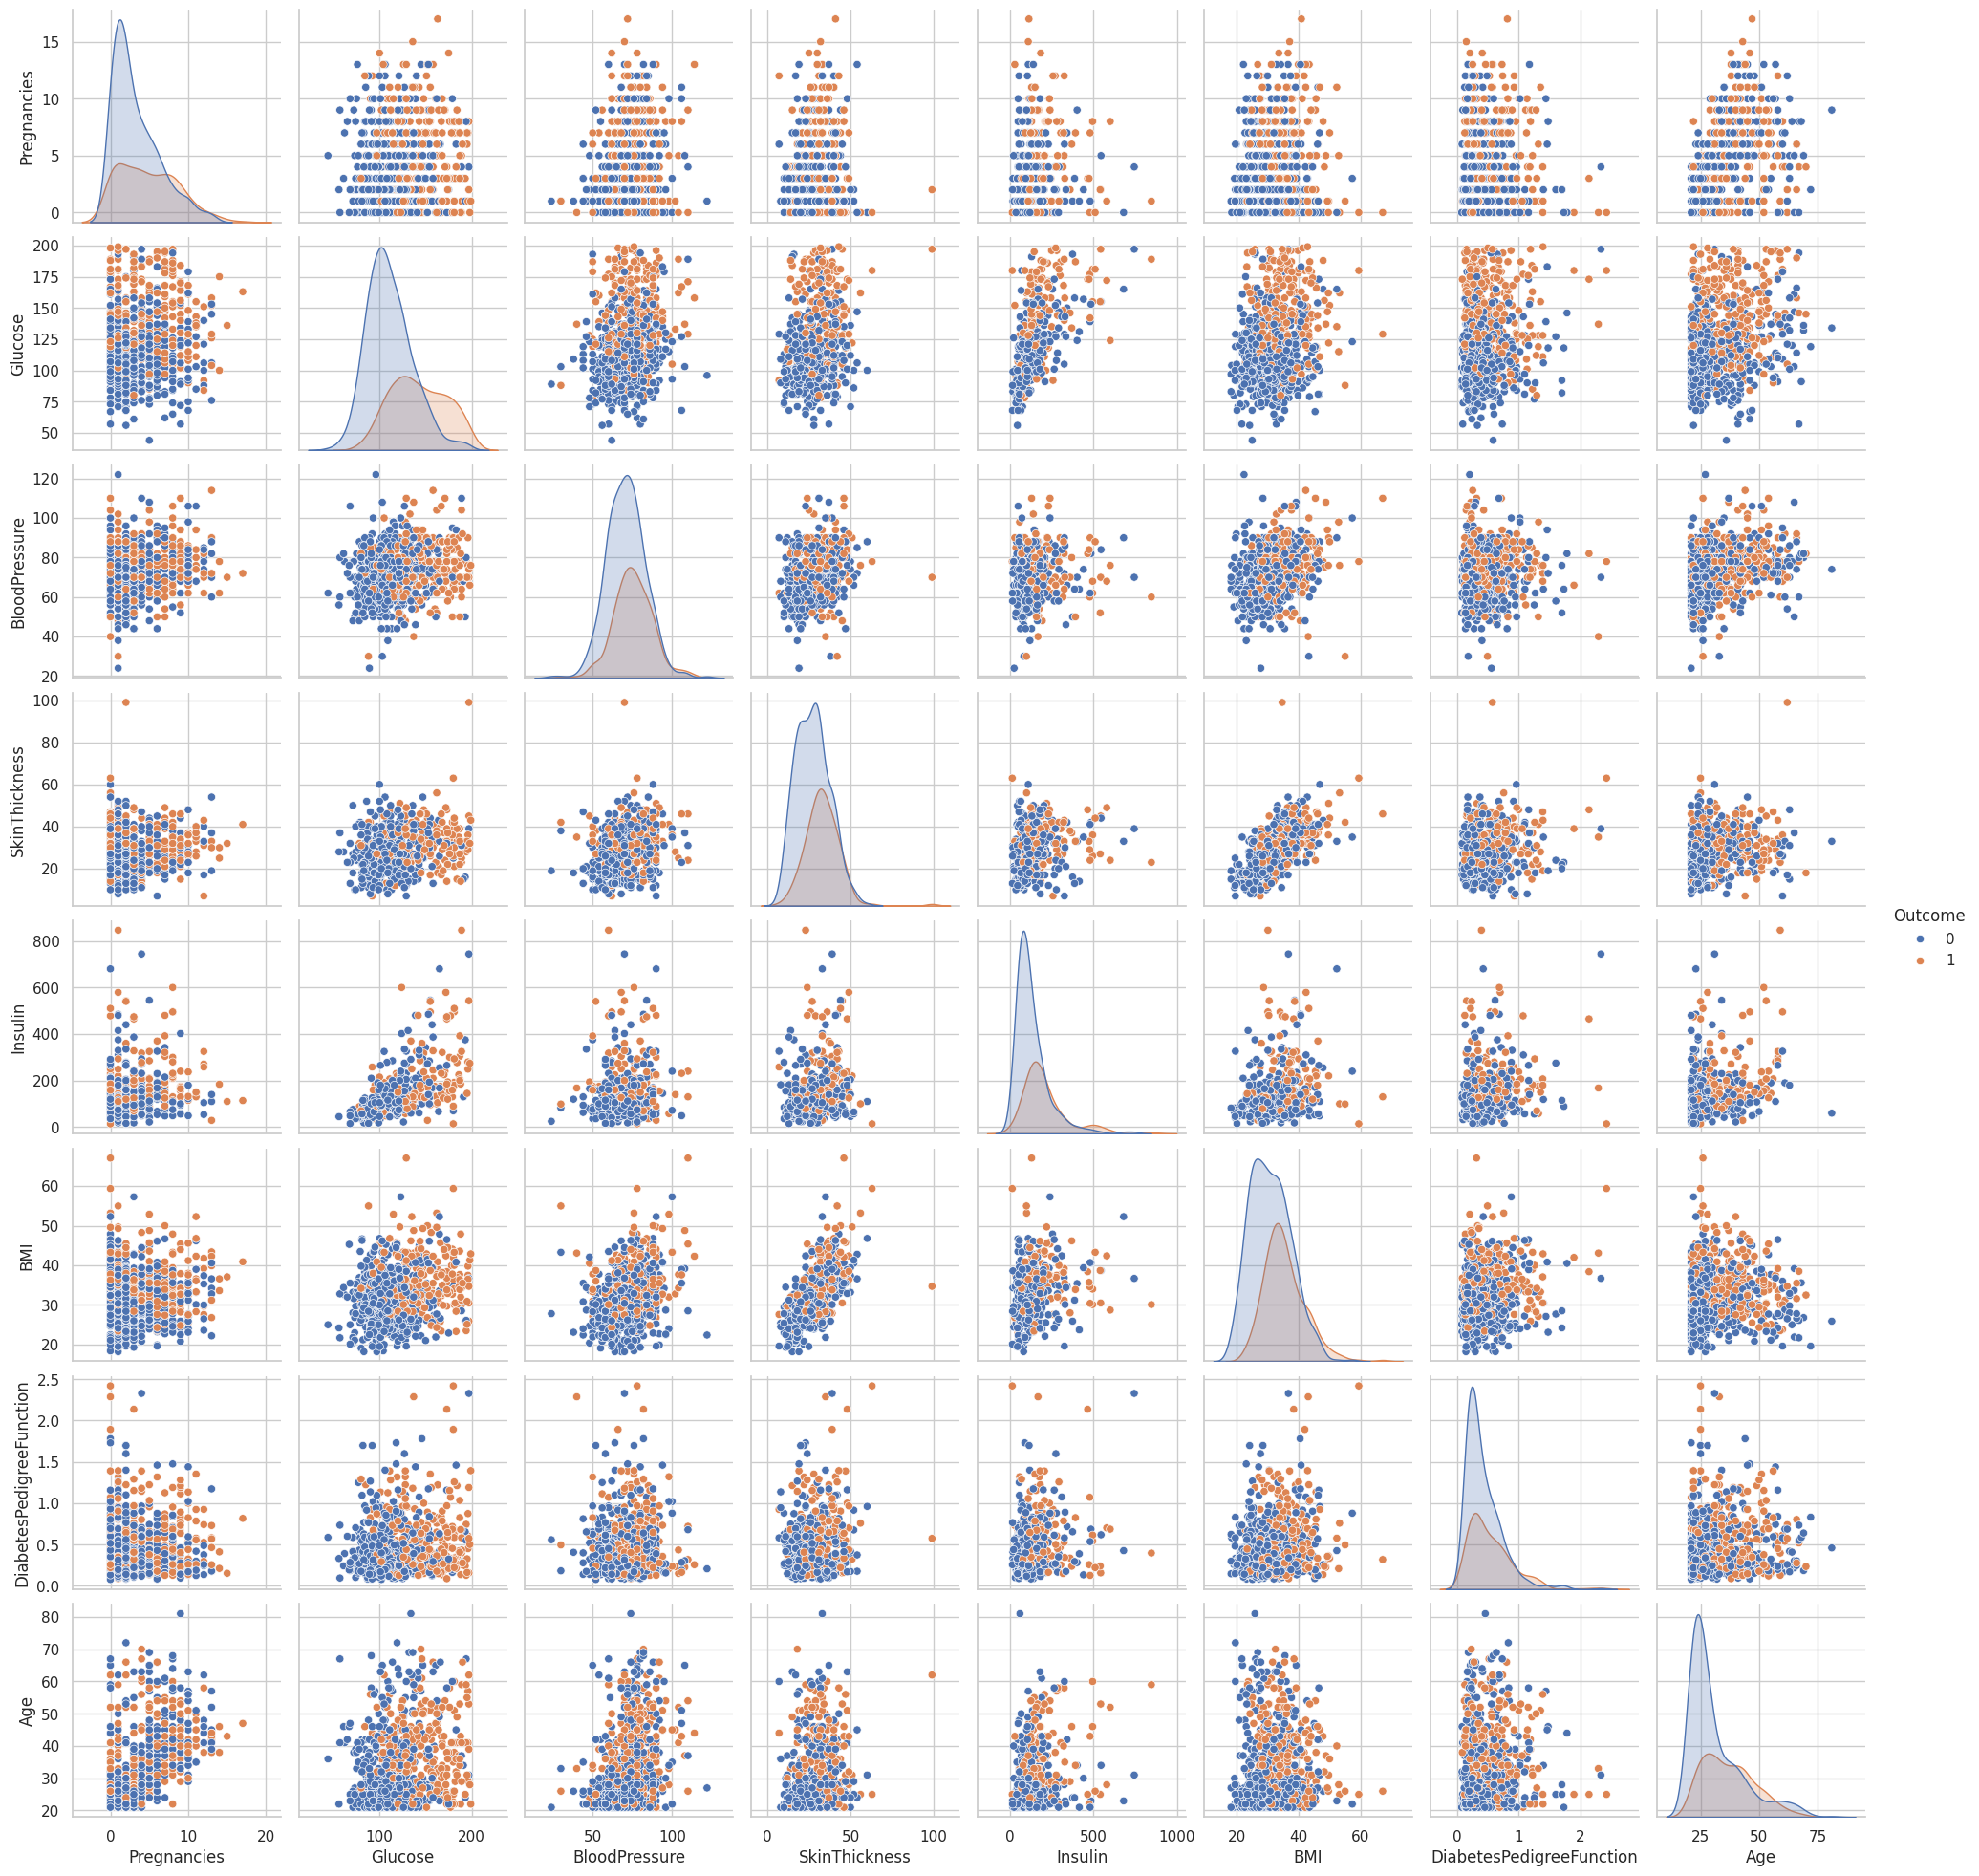

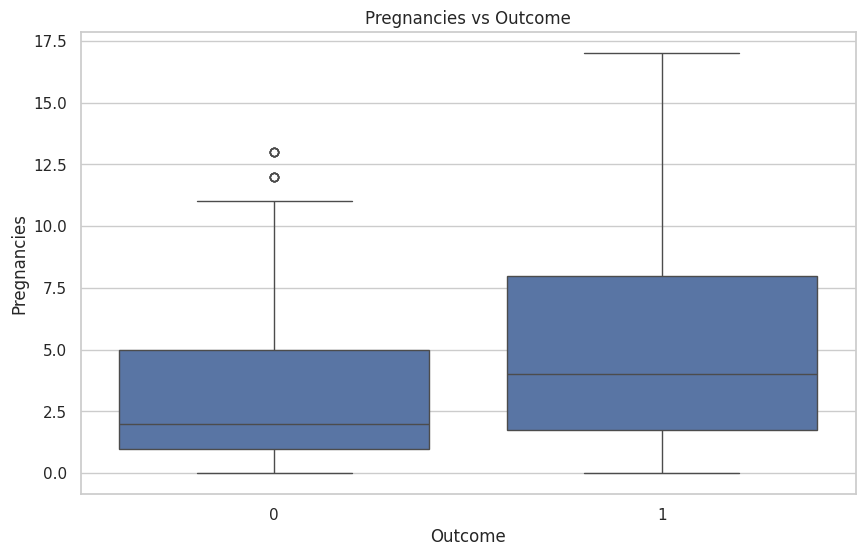

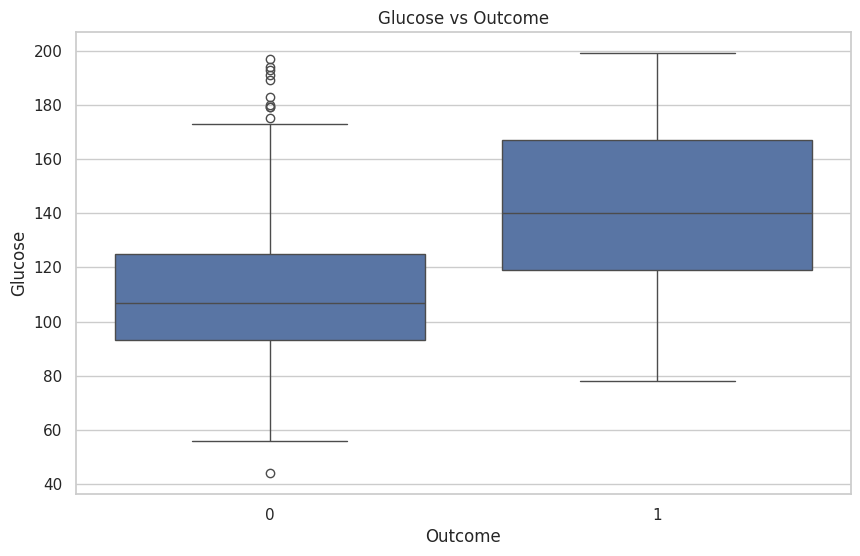

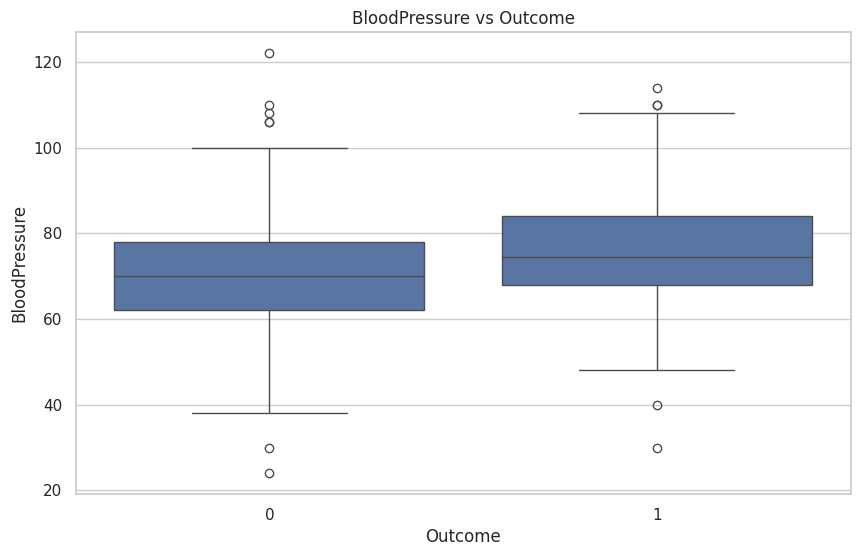

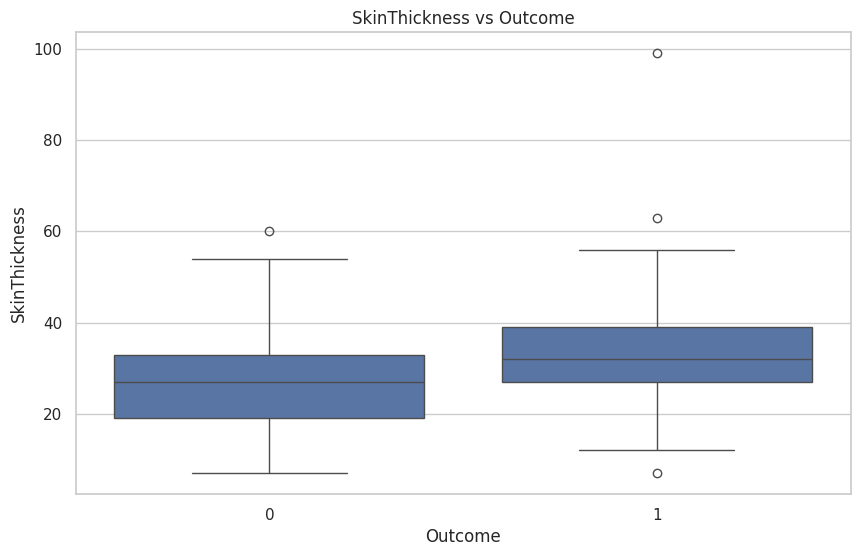

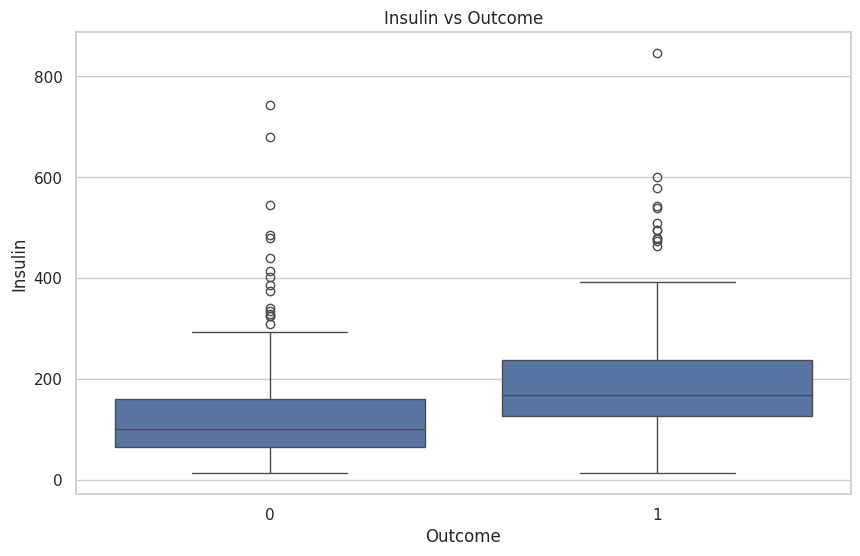

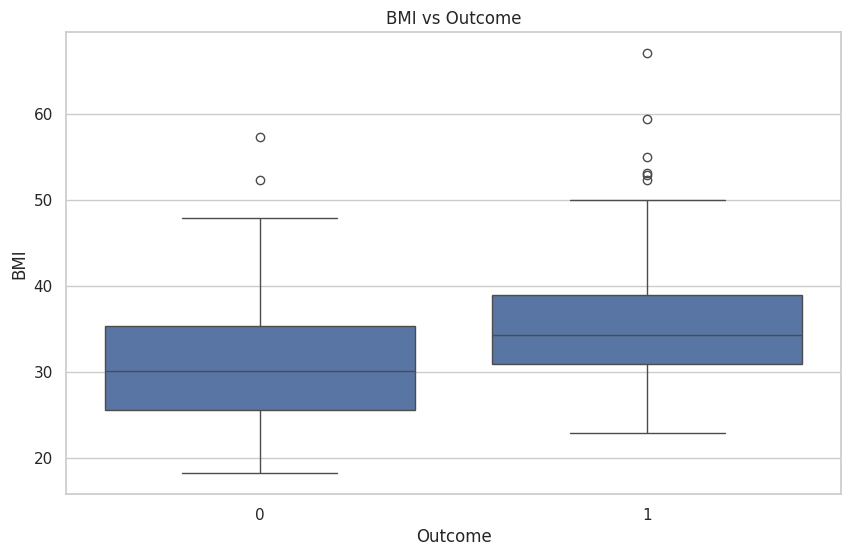

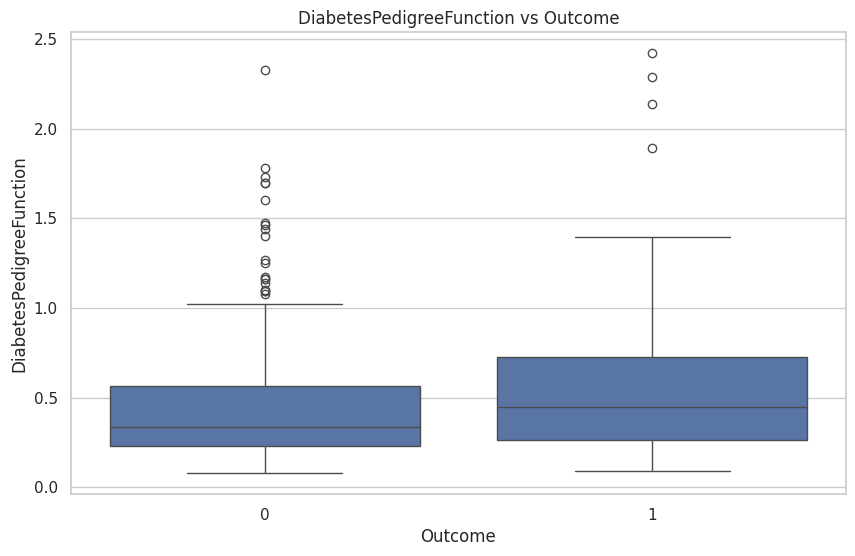

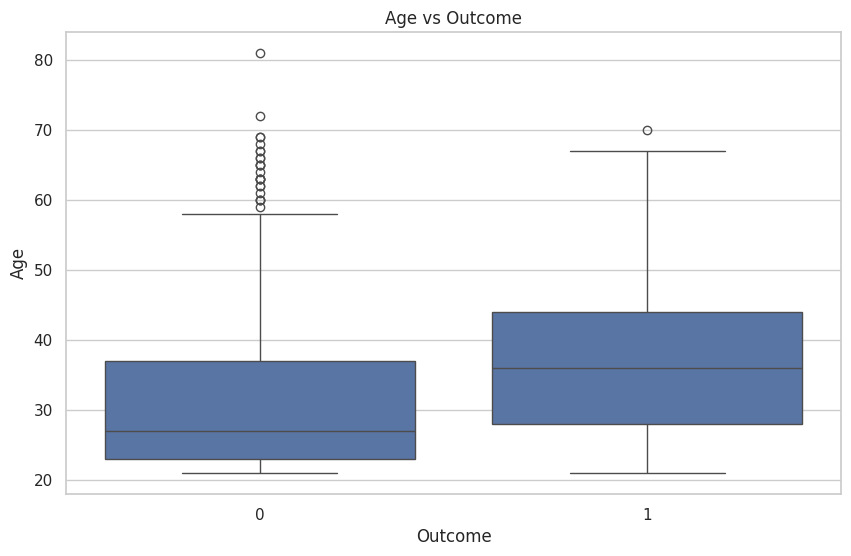

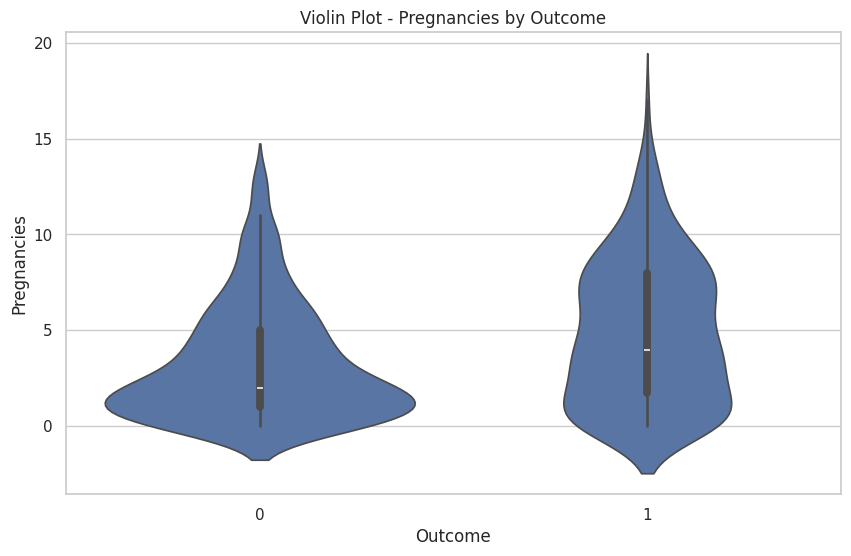

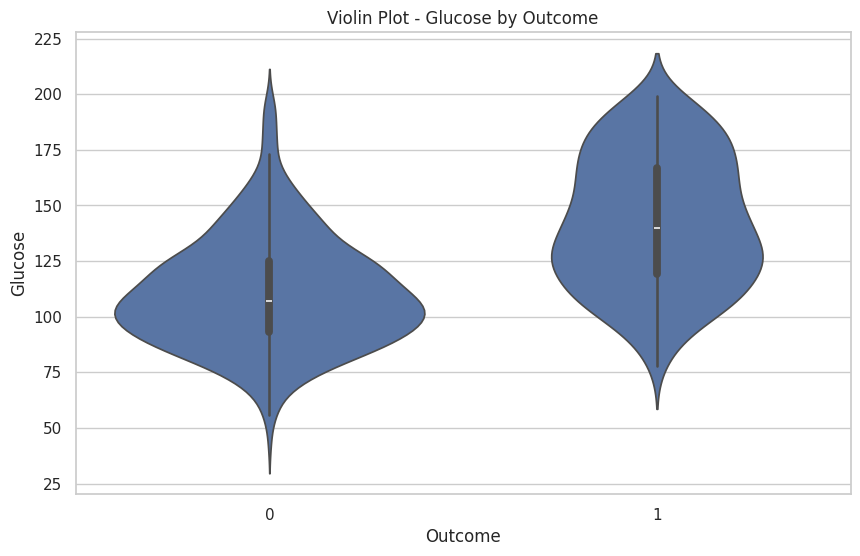

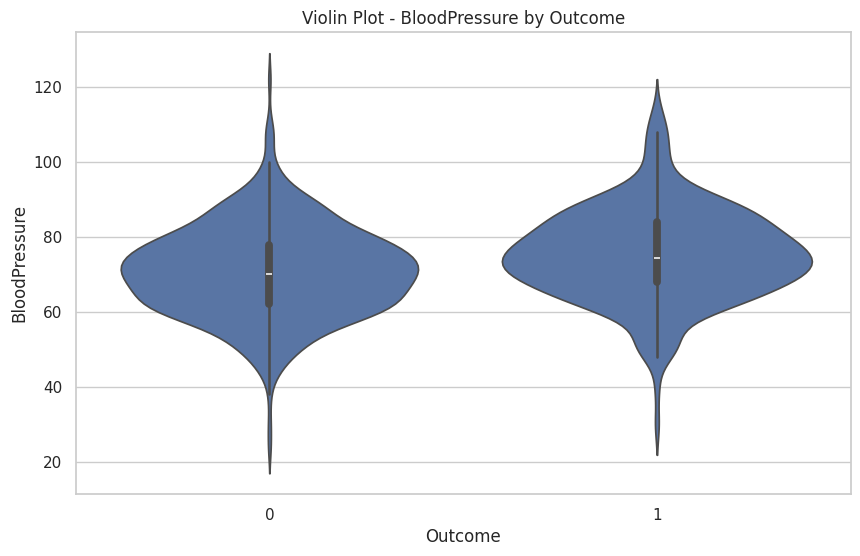

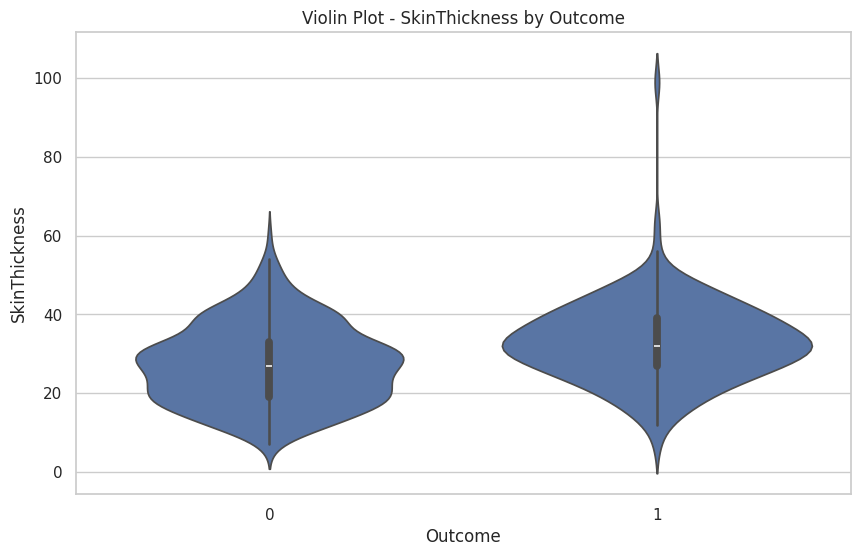

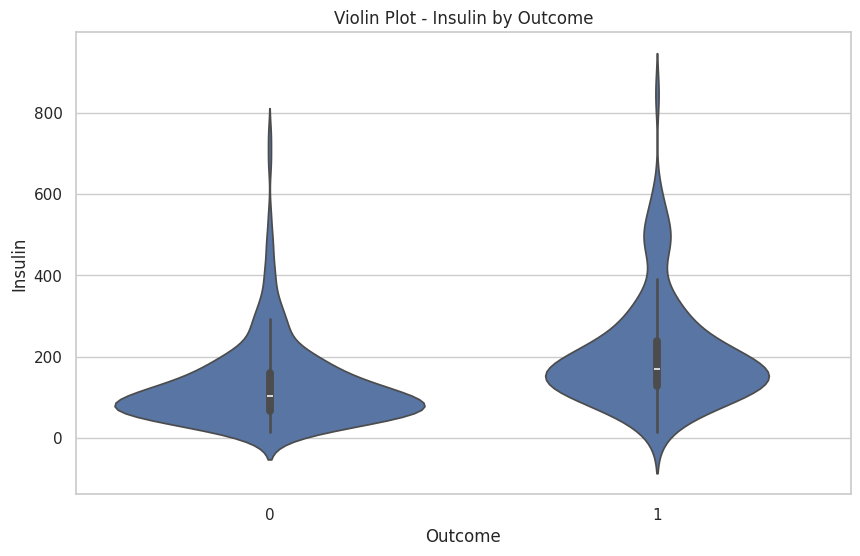

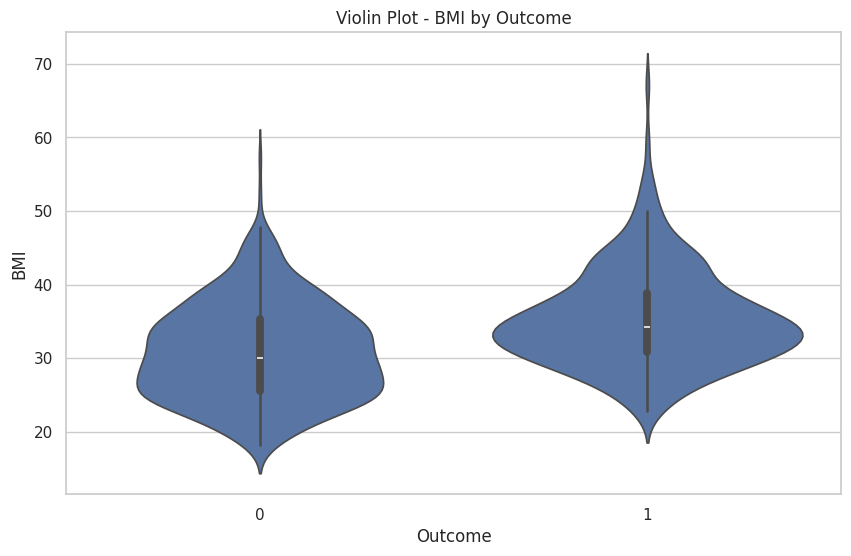

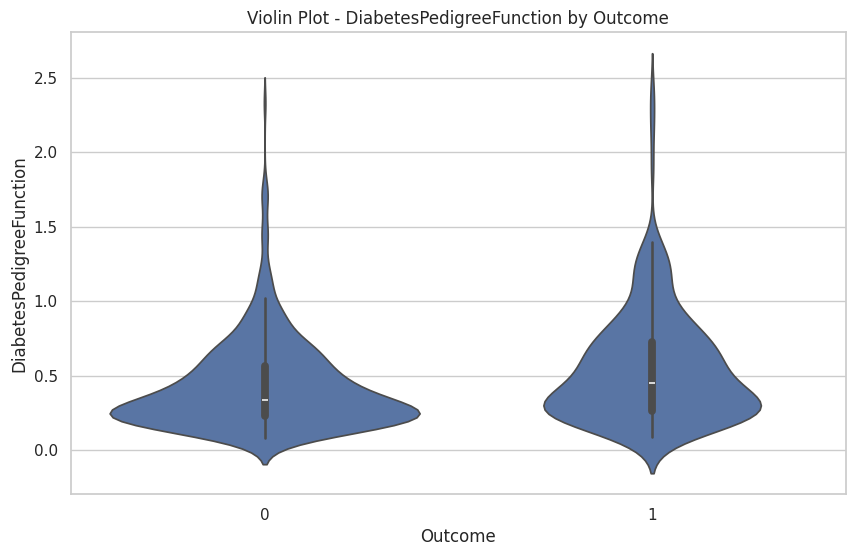

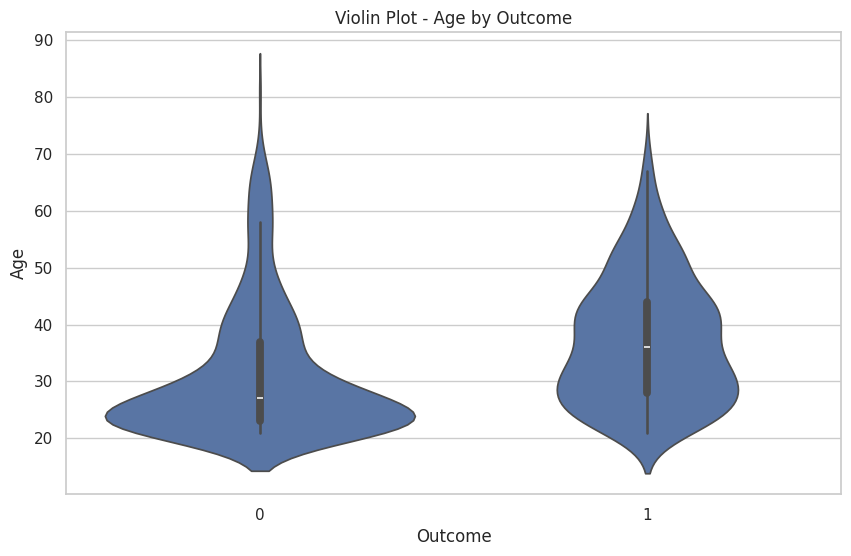

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.show()

# Box plots by Outcome
for col in df.columns[:-1]:
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Outcome')
    plt.show()

# Violin plots
for col in df.columns[:-1]:
    sns.violinplot(x='Outcome', y=col, data=df)
    plt.title(f'Violin Plot - {col} by Outcome')
    plt.show()



Outcome-based Summary

In [9]:
# Group by Outcome
outcome_summary = df.groupby('Outcome').mean().T
outcome_summary['Diff'] = outcome_summary[1] - outcome_summary[0]
outcome_summary.sort_values("Diff", ascending=False)

Outcome,0,1,Diff
Insulin,130.287879,206.846154,76.558275
Glucose,110.643863,142.319549,31.675686
Age,31.190000,37.067164,5.877164
SkinThickness,27.235457,33.000000,5.764543
BMI,30.859674,35.406767,4.547093
BloodPressure,70.877339,75.321429,4.444090
Pregnancies,3.298000,4.865672,1.567672
DiabetesPedigreeFunction,0.429734,0.550500,0.120766


Handling Missing Values

In [10]:
# Impute with median
df[cols_with_missing_zeros] = df[cols_with_missing_zeros].fillna(df[cols_with_missing_zeros].median())

# Double-check
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Outlier Detection (IQR Method)

In [11]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Example
for col in df.columns[:-1]:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

# You can remove or cap these if needed


Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 87 outliers
Insulin: 346 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers


Summary of Findings

In [12]:
print("✔ Dataset Shape:", df.shape)
print("✔ Missing Values:", df.isnull().sum().sum())
print("✔ Features most correlated with Outcome:\n", df.corr()['Outcome'].sort_values(ascending=False)[1:4])

✔ Dataset Shape: (768, 9)
✔ Missing Values: 0
✔ Features most correlated with Outcome:
 Glucose    0.492782
BMI        0.312038
Age        0.238356
Name: Outcome, dtype: float64
